# 2024-12-05 Cnb Figure plots
This notebook uses `seaborn` to visualize the data found in the Cnb figure. 


In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 
1. The first cell calls `pwd`, which returns the current working directory that the code is working in. 
2. The second cell calls `ls`, which returns the list of files in the current directory.
3. The third cell sets the home directory to a variable, and sets the figure directory to another one.  

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure6'

In [3]:
ls

2024-11-19 Cnb counts.ipynb        figs/
2024-12-05 Cnb Figure Plots.ipynb  output/
data/


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure6'
figs_dir = home_dir + '/figs/'
data_dir = home_dir + '/data/'
outs_dir = home_dir + '/output/'

## Calling in the data
- This script calls in the file called "2024-12-05 Cnb metadata.xlsx" and pulls the data in the `sheet_name` "Cnb Python". This data is comprised of manually selected values from the metadata master file, which is titled "2024-12-05 Cnb metadata.xlsx".
- This manually created dataframe has the columns `Genotype`, `phase`, and Centrobin `AC/Cyto Ratio` data which will be used for plotting.
- This cell calls in the data and asigns it to the variable `data` and prints the first 5 rows using `.head(5)`. 

In [5]:
# reading in data
os.chdir(data_dir)
data = pd.read_excel("2024-12-05 Cnb metadata.xlsx", sheet_name = 'Cnb Python').dropna().reset_index()
data['class'] = data['Genotype']
for i in range(0, len(data)):
    if data.loc[i, 'Genotype'] != 'WT':
        data.loc[i, 'class'] = 'PP4KO'
data.head(5)

,index,File Name,Genotype,phase,AC/Cyto interphase,class
0,1,2021-02-24_WT-Cnb-Nb1,WT,interphase,6.595238,WT
1,2,2021-02-24_WT-Cnb-Nb3,WT,interphase,3.534884,WT
2,3,2021-02-24_WT-Cnb-Nb4,WT,interphase,6.250000,WT
3,4,2021-02-24_WT-Cnb-Nb5,WT,interphase,4.385965,WT
4,5,2021-02-11_WT-Cnb-Nb6,WT,interphase,10.540000,WT


## Plot 1: WT vs PP4KO, 1X Cnb interphase and prometaphase

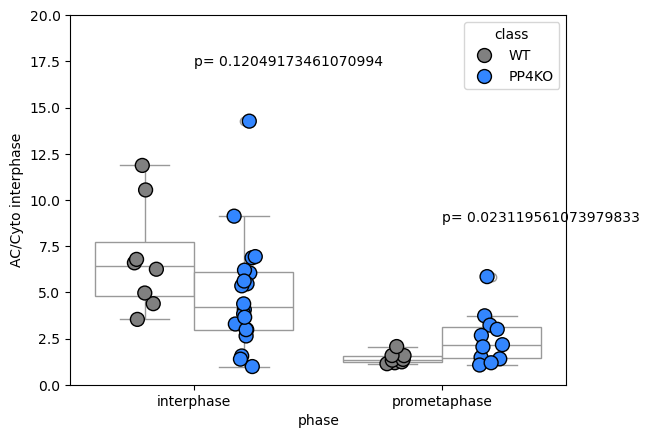

In [6]:
p = ['grey', '#3386FF'] # sets palette
ho = ['WT', 'PP4KO'] # sets hue order
wf = data

sns.stripplot(x = 'phase', y = 'AC/Cyto interphase', data = wf,
               hue = 'class', palette = p, 
               size = 10, edgecolor = 'k', linewidth = 1,
               hue_order = ho, legend = True, dodge = True);

sns.boxplot(x = 'phase', y = 'AC/Cyto interphase', data = wf,
               hue = 'class', palette = ['w','w'], 
               hue_order = ho, legend = False);

plt.ylim(0,20)

# stats
param1 = wf[(wf['class']=='WT') & (wf['phase']=='interphase')]['AC/Cyto interphase']
param2 = wf[(wf['class']=='PP4KO') & (wf['phase']=='interphase')]['AC/Cyto interphase']
pvalue = independent_ttest(param1, param2, 0.05)[3]
plt.annotate(f"p= {pvalue}", xy = (0, param2.max()+3))

param1 = wf[(wf['class']=='WT') & (wf['phase']=='prometaphase')]['AC/Cyto interphase']
param2 = wf[(wf['class']=='PP4KO') & (wf['phase']=='prometaphase')]['AC/Cyto interphase']
pvalue = independent_ttest(param1, param2, 0.05)[3]
plt.annotate(f"p= {pvalue}", xy = (1, param2.max()+3))

os.chdir(figs_dir)
plt.savefig('WT vs Pp4KO CnbGFP.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Plot 2: WT vs PP4KO with 0X and 2X Cnb

/var/folders/7j/kpbznrn516x6ztdnl0mk04w80000gn/T/ipykernel_31562/75791289.py:10: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'Genotype', y = 'AC/Cyto interphase', data = wf,


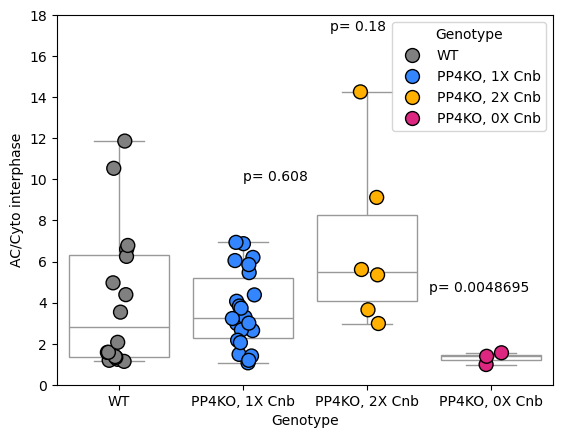

In [7]:
p = ['grey', '#3386FF', '#FFB000', '#DC267F'] # sets palette
ho = ['WT', 'PP4KO, 1X Cnb', 'PP4KO, 2X Cnb', 'PP4KO, 0X Cnb'] # sets hue order
wf = data.dropna()

sns.stripplot(x = 'Genotype', y = 'AC/Cyto interphase', data = wf,
               hue = 'Genotype', palette = p, 
               size = 10, edgecolor = 'k', linewidth = 1,
               hue_order = ho, legend = True);

sns.boxplot(x = 'Genotype', y = 'AC/Cyto interphase', data = wf,
               hue = 'Genotype', palette = ['w','w'], 
               hue_order = ho, legend = False);

plt.ylim(0,18)

# stats
param1 = wf[wf['Genotype']=='WT']['AC/Cyto interphase']
param2 = wf[wf['Genotype']=='PP4KO, 1X Cnb']['AC/Cyto interphase']
pvalue = independent_ttest(param1, param2, 0.05)[3]
plt.annotate(f"p= {np.round(pvalue, decimals = 3)}", xy = (1, param2.max()+3))

param3 = wf[wf['Genotype']=='PP4KO, 2X Cnb']['AC/Cyto interphase']
pvalue = independent_ttest(param1, param3, 0.05)[3]
plt.annotate(f"p= {np.round(pvalue, decimals = 3)}", xy = (1.7, param3.max()+3))

param4 = wf[wf['Genotype']=='PP4KO, 0X Cnb']['AC/Cyto interphase']
pvalue = independent_ttest(param1, param4, 0.05)[3]
plt.annotate(f"p= {np.round(pvalue, decimals = 7)}", xy = (2.5, param4.max()+3))

os.chdir(figs_dir)
plt.savefig('WT vs Pp4KO CnbGFP, 1X 0X and 2X.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

In [8]:
# resets directory to home
os.chdir(home_dir) 

# Stats

In [9]:
data.head(5)

,index,File Name,Genotype,phase,AC/Cyto interphase,class
0,1,2021-02-24_WT-Cnb-Nb1,WT,interphase,6.595238,WT
1,2,2021-02-24_WT-Cnb-Nb3,WT,interphase,3.534884,WT
2,3,2021-02-24_WT-Cnb-Nb4,WT,interphase,6.250000,WT
3,4,2021-02-24_WT-Cnb-Nb5,WT,interphase,4.385965,WT
4,5,2021-02-11_WT-Cnb-Nb6,WT,interphase,10.540000,WT


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
tests = [
    ['WT', 'PP4KO, 1X Cnb', 'interphase', 'AC/Cyto interphase'],
    ['WT', 'PP4KO, 2X Cnb', 'interphase', 'AC/Cyto interphase'],
    ['WT', 'PP4KO, 0X Cnb', 'interphase', 'AC/Cyto interphase']
]

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['Genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['Genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
os.chdir(outs_dir)
stats_table.to_csv('FIG6 Cnb intensity stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"PP4KO, 1X Cnb",interphase,Unpaired Student's T-test,AC/Cyto interphase,8,11,6.86E+00,4.79E+00,2.92E+00,1.57E+00,2.00E+00,17,N/A,6.14584e-02,ns
1,WT,"PP4KO, 2X Cnb",interphase,Unpaired Student's T-test,AC/Cyto interphase,8,6,6.86E+00,6.83E+00,2.92E+00,4.22E+00,1.85E-02,12,N/A,9.85524e-01,ns
2,WT,"PP4KO, 0X Cnb",interphase,Unpaired Student's T-test,AC/Cyto interphase,8,3,6.86E+00,1.31E+00,2.92E+00,2.94E-01,3.18E+00,9,N/A,1.12066e-02,*
